In [61]:
import ir_datasets
import pandas as pd
from tqdm import tqdm

In [2]:
negatives = ir_datasets.load("msmarco-qna/train")
qrels = pd.DataFrame(negatives.qrels_iter())

[INFO] [starting] building msmarco-passage lookup
[INFO] [finished] building msmarco-passage lookup: [00:45] [8841823doc] [193651.92doc/s]
[INFO] [starting] building msmarco-document lookup
[INFO] [finished] building msmarco-document lookup: [15:40] [3213835doc] [3416.51doc/s]
[INFO] [starting] processing qna
[INFO] [starting] merging train files                                                                                    
processing qna: 64354619item [08:07, 131955.89item/s, file=eval, missing_urls=875084, key=]
merging train files: 0doc [00:00, ?doc/s]
merging train files: 12502doc [00:00, 124633.82doc/s]
merging train files: 25110doc [00:00, 125352.72doc/s]
merging train files: 37718doc [00:00, 125204.99doc/s]
merging train files: 50326doc [00:00, 125233.63doc/s]
merging train files: 62955doc [00:00, 125441.05doc/s]
merging train files: 75584doc [00:00, 125506.45doc/s]
merging train files: 88213doc [00:00, 125229.23doc/s]
merging train files: 100871doc [00:00, 125398.95doc/s]


In [3]:
qrels

,query_id,doc_id,relevance,iteration
0,1185869,0-0,1,0
1,1185869,1-0,0,0
2,1185869,2-0,0,0
3,1185869,3-0,0,0
4,1185869,4-0,0,0
...,...,...,...,...
8069744,461916,7066854-0,0,0
8069745,461916,7066855-0,0,0
8069746,461916,7066856-0,0,0
8069747,461916,2259772-0,0,0


In [5]:
qid_grouped = qrels.groupby('query_id')

In [58]:
type(qid_grouped.ngroups)

int

In [50]:
for group in qid_grouped:
    print(group)
    break

('1',        query_id     doc_id  relevance iteration
485333        1  4063745-0          0         0
485334        1  4063746-0          0         0
485335        1  4063747-0          0         0
485336        1  4063748-0          0         0
485337        1  4063749-0          0         0
485338        1  4063750-0          0         0
485339        1  4063751-0          0         0
485340        1  4063752-0          0         0
485341        1  4063753-0          0         0
485342        1  4063754-0          0         0)


In [59]:
negative_counts = {}
n_group = qid_grouped.ngroups
with tqdm(total=n_group) as pbar:
    for group in qid_grouped:
        tmp = 0
        # if group['relevance'].iloc[0] == 1:
           # tmp.extend(group['doc_id'].tolist()[1:FAILURE+1])
           # continue
        for _, row in group[1].iterrows():
            if row.relevance == 1:
                break
            else:
                tmp+=1
        qid = group[0]
        negative_counts[qid] = tmp
        pbar.update(1)

TypeError: 'module' object is not callable

In [64]:
negative_counts = {}
for group in tqdm(qid_grouped):
    tmp = 0
    # if group['relevance'].iloc[0] == 1:
       # tmp.extend(group['doc_id'].tolist()[1:FAILURE+1])
       # continue
    for _, row in group[1].iterrows():
        if row.relevance == 1:
            break
        else:
            tmp+=1
    qid = group[0]
    negative_counts[qid] = tmp

100%|█████████████████████████████████| 808731/808731 [03:55<00:00, 3439.16it/s]


In [69]:
from collections import Counter

In [88]:
negatives_dist = dict(sorted(dict(Counter(negative_counts.values())).items()))

In [94]:
negatives_dist

{0: 98662,
 1: 71790,
 2: 58617,
 3: 50297,
 4: 44938,
 5: 40637,
 6: 38470,
 7: 36036,
 8: 33722,
 9: 33694,
 10: 301704,
 11: 15,
 12: 9,
 13: 16,
 14: 11,
 15: 12,
 16: 9,
 17: 13,
 18: 40,
 19: 4,
 21: 2,
 22: 3,
 23: 2,
 24: 1,
 25: 5,
 26: 4,
 27: 18}

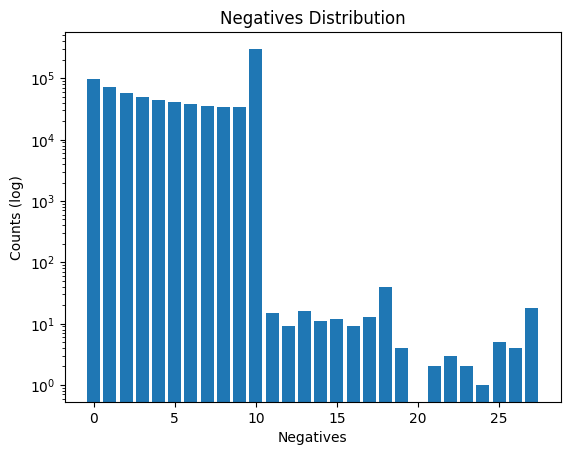

In [99]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.bar(negatives_dist.keys(), negatives_dist.values())

nc_title = 'Negatives Distribution'
ax.set_ylabel('Counts (log)')
ax.set_xlabel('Negatives')
ax.set_title(nc_title)
ax.set_yscale('log')

plt.show()